In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval
from nltk import word_tokenize
from collections import defaultdict
from FightingWords.fighting_words_py3 import bayes_compare_language
from FightingWords.fighting_words_py3 import basic_sanitize
from matplotlib import pyplot as plt 
from adjustText import adjust_text
from tqdm import tqdm
import spacy
nlp=spacy.load('en_core_web_sm')

/Users/mstudio/miniconda3/envs/py3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path='/Users/mstudio/Library/CloudStorage/Box-Box/coolie/token/'
df=pd.read_csv(path+'coolie-token-lemma.csv', converters={'state':literal_eval, 'sent':literal_eval, 'city':literal_eval, 'lemma':literal_eval})

In [3]:
df['lemma_str']=df['lemma'].apply(lambda x: ' '.join(x))

In [4]:
df['lemma_str']=df['lemma_str'].astype(str)

In [5]:
df['state_str']=df['state'].str[0]

In [6]:
descriptive=df.groupby('state_str').size().reset_index(name='count').sort_values(by='count', ascending=False)
# descriptive['count'].sum()
descriptive

,state_str,count
8,District of Columbia,11302
11,Hawaii,8613
31,New York,7671
4,California,6814
23,Minnesota,3966
13,Illinois,3619
27,Nebraska,3165
6,Connecticut,3132
34,Ohio,3102
44,Utah,3030


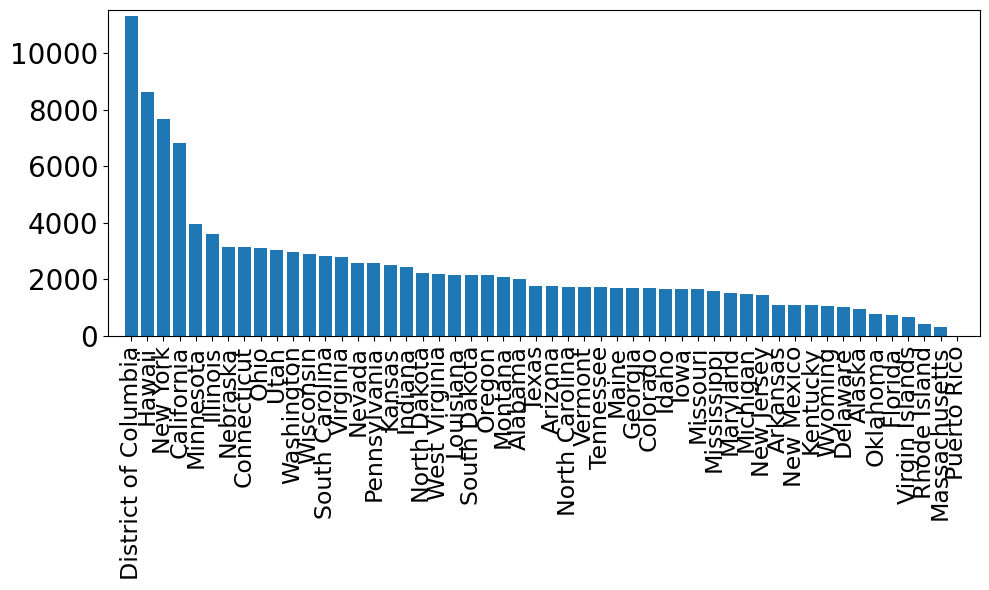

In [7]:
# Create a bar plot
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
plt.margins(0.02)
plt.bar(descriptive['state_str'], descriptive['count'])
# plt.xlabel('State')
# plt.ylabel('Count')
# plt.title('State Counts')

# Display the plot
plt.xticks(rotation=90, fontsize=17)
plt.yticks(fontsize=20)
  # Optional: Rotate state names for better visibility
plt.tight_layout()  # Optional: Ensure the labels fit within the figure
plt.savefig('eacl2023_latex/figure/'+'descriptive.pdf', dpi=200, bbox_inches='tight')
plt.show()



In [8]:
confederate_states=['Virginia',
              'Tennessee','Arkansas','Florida',
              'Alabama','Louisiana','North Carolina',
              'South Carolina','Mississippi',
              'Texas','Georgia']

In [9]:
union_states=['Maine', 'New York', 'New Hampshire', 'Vermont',
              'Massachusetts', 'Connecticut', 'Rhode Island',
              'Pennsylvania', 'New Jersey', 'Ohio',
              'Indiana', 'Illinois', 'Kansas',
                'Michigan', 'Wisconsin', 'Minnesota',
                'Iowa', 'California', 'Nevada', 'Oregon',
                'West Virginia', 'Delaware', 'Maryland']

In [10]:
confederate=df[df['state_str'].isin(confederate_states)]
union=df[df['state_str'].isin(union_states)]

In [11]:
print(confederate.shape, union.shape)

(20206, 9) (56939, 9)


In [12]:
language=bayes_compare_language(union['lemma_str'], confederate['lemma_str'])

Vocab size is 6984
Comparing language...


In [13]:
language_z_df=pd.DataFrame(language, columns=['token', 'z-score'])

In [14]:
language_z_df_outlier=pd.DataFrame(language, columns=['token', 'z-score'])

In [15]:
df[df['lemma_str'].str.contains('health')].groupby(by='state_str').count().sort_values(by='lemma_str', ascending=False)[:5]

,state,city,date,lccn,sent,title,lemma,lemma_str
state_str,,,,,,,,
New York,26,26,26,26,26,26,26,26
Hawaii,16,16,16,16,16,16,16,16
District of Columbia,14,14,14,14,14,14,14,14
Oregon,7,7,7,7,7,7,7,7
California,6,6,6,6,6,6,6,6


In [16]:
df[df['lemma_str'].str.contains('revival')].groupby(by='state_str').count().sort_values(by='lemma_str', ascending=False)[:5]

,state,city,date,lccn,sent,title,lemma,lemma_str
state_str,,,,,,,,
Illinois,61,61,61,61,61,61,61,61
Louisiana,17,17,17,17,17,17,17,17
Arkansas,15,15,15,15,15,15,15,15
West Virginia,13,13,13,13,13,13,13,13
Tennessee,13,13,13,13,13,13,13,13


In [17]:
df[(df['state_str']=='Illinois')&(df['lemma_str'].str.contains('revival'))]

,state,city,date,lccn,sent,title,lemma,lemma_str,state_str
22273,[Illinois],[Chicago],18760701,sn84031492,"[liberty, loving, german, ,, and, tolerates, a...",Chicago daily tribune. [volume],"[liberty, love, german, tolerate, revival, tho...",liberty love german tolerate revival tho cooli...,Illinois
24938,[Illinois],[Cairo],18690710,sn88074143,"[birth, of, slavery, ., '', meauing, tho, revi...",The Cairo evening bulletin.,"[birth, slavery, meaue, tho, revival, coolie, ...",birth slavery meaue tho revival coolie trade t...,Illinois
51405,[Illinois],[Rock Island],18760628,sn92053942,"[the, liberty-loving, german, and, toler, ates...",The daily Argus.,"[german, toler, ates, revival, coolie, trade, ...",german toler ates revival coolie trade mon gol...,Illinois
52802,"[Illinois, Michigan, Ohio, Pennsylvania]","[Chicago, Detroit, Cincinnati, Philadelphia]",18690904,sn89077510,"[attempta, of, unprincipled, and, interested, ...",The workingman's advocate. [volume],"[attempta, unprinciple, interested, party, rev...",attempta unprinciple interested party revive i...,Illinois
62125,[Illinois],[Cairo],18761017,sn85033413,"[discards, the, liberty-lovintt, oettnan, and,...",The Cairo bulletin. [volume],"[discards, oettnan, tolerate, revival, tae, co...",discards oettnan tolerate revival tae coolie t...,Illinois
...,...,...,...,...,...,...,...,...,...
121232,[Illinois],[Cairo],18761013,sn85033413,"[discard, lhe, lihertt-lomng, iermn, nd, toler...",The Cairo bulletin. [volume],"[discard, lhe, iermn, nd, tolerates, revival, ...",discard lhe iermn nd tolerates revival coolie ...,Illinois
121233,[Illinois],[Cairo],18760818,sn85033413,"[discard, the, liberty-loving, gertnsn, and, t...",The Cairo bulletin. [volume],"[discard, gertnsn, tolerate, revival, coolie, ...",discard gertnsn tolerate revival coolie trad m...,Illinois
121234,[Illinois],[Cairo],18760923,sn85033413,"[the, liberty-loviog, (, lernian, and, tolerat...",The Cairo bulletin. [volume],"[lernian, tolerate, revival, coolie, trade, mo...",lernian tolerate revival coolie trade mongolia...,Illinois
121235,[Illinois],[Cairo],18760927,sn85033413,"[discards, the, liberty-loving, gorman, and, t...",The Cairo bulletin. [volume],"[discards, gorman, tolerate, revival, coolie, ...",discards gorman tolerate revival coolie trad m...,Illinois


In [18]:
df[(df['state_str']=='Arkansas')&(df['lemma_str'].str.contains('revival'))]

,state,city,date,lccn,sent,title,lemma,lemma_str,state_str
10589,[Arkansas],[Russellville],18760720,sn84023017,"[liberty, loving, german, and, ;, tolerates, t...",The Russellville Democrat. [volume],"[liberty, love, german, tolerate, revival, coo...",liberty love german tolerate revival coolie tr...,Arkansas
10590,[Arkansas],[Russellville],18760831,sn84023017,"[liberty-loving, german, and, !, tolerat, s, t...",The Russellville Democrat. [volume],"[german, tolerat, revival, coolie, trade, mong...",german tolerat revival coolie trade mongolian ...,Arkansas
95530,[Arkansas],[Russellville],18761019,sn84023017,"[liberty, loving, german, and, j, tolerates, t...",The Russellville Democrat. [volume],"[liberty, love, german, j, tolerate, revival, ...",liberty love german j tolerate revival coolie ...,Arkansas
95531,[Arkansas],[Russellville],18761026,sn84023017,"[discards, the, liberty-loving, german, and, t...",The Russellville Democrat. [volume],"[discard, german, tolerate, revival, coolie, t...",discard german tolerate revival coolie trade m...,Arkansas
100481,[Arkansas],[Russellville],18760824,sn84023017,"[tin.-, liberty, loving, german, and, tolerate...",The Russellville Democrat. [volume],"[liberty, love, german, tolerate, revival, coo...",liberty love german tolerate revival coolie tr...,Arkansas
103483,[Arkansas],[Russellville],18760810,sn84023017,"[discards, the, liberty-loving, german, and, t...",The Russellville Democrat. [volume],"[discard, german, tolerate, revival, coolie, t...",discard german tolerate revival coolie trade m...,Arkansas
103485,[Arkansas],[Russellville],18760817,sn84023017,"[the, liberty, hiving, german, and, tolerates,...",The Russellville Democrat. [volume],"[liberty, hive, german, tolerate, revival, coo...",liberty hive german tolerate revival coolie tr...,Arkansas
103487,[Arkansas],[Russellville],18760907,sn84023017,"[the, liberty, loving, german, and, tolerates,...",The Russellville Democrat. [volume],"[liberty, love, german, tolerate, revival, coo...",liberty love german tolerate revival coolie tr...,Arkansas
103488,[Arkansas],[Russellville],18760914,sn84023017,"[discards, the, liberty-loving, german, and, t...",The Russellville Democrat. [volume],"[discard, german, tolerate, revival, coolie, t...",discard german tolerate revival coolie trade m...,Arkansas
103489,[Arkansas],[Russellville],18761005,sn84023017,"[discards, the, liberty-loving, german, and, t...",The Russellville Democrat. [volume],"[discard, german, tolerate, revival, coolie, t...",discard german tolerate revival coolie trade m...,Arkansas


In [19]:
df[(df['state_str']=='Arkansas')&(df['lemma_str'].str.contains('revival'))].loc[10589, 'lemma']

['liberty',
 'love',
 'german',
 'tolerate',
 'revival',
 'coolie',
 'trade',
 'mongolian',
 'woman',
 'iin']

In [20]:
df[(df['state_str']=='Illinois')&(df['lemma_str'].str.contains('revival'))].loc[22273, 'lemma']

['liberty',
 'love',
 'german',
 'tolerate',
 'revival',
 'tho',
 'coolie',
 'trade',
 'mongolian',
 'woman',
 'import',
 'immoral',
 'purpose']

In [21]:
language_z_df

,token,z-score
0,hitch,-11.100073
1,thc,-10.666613
2,france,-9.601418
3,trade,-7.932866
4,design,-7.772678
...,...,...
6979,importation,5.510126
6980,tho,6.190484
6981,servile,6.422653
6982,birch,9.098481


In [22]:
language_z_df[language_z_df['token']=='korean']

,token,z-score
1755,korean,-0.856808


In [23]:
language_z_df.to_csv(path + 'z-score-union-confederate.csv', index=False)

In [24]:
len([item for sublist in df['lemma'] for item in sublist])

1291651

In [25]:
frequency_language=defaultdict(int)
for word in tqdm([item for sublist in df['lemma'] for item in sublist]):
    if word in language_z_df['token'].values:
        frequency_language[word]+=1

100%|██████████| 1291651/1291651 [01:24<00:00, 15358.58it/s]


In [26]:
frequency_list=[]
for word in frequency_language.keys():
    frequency_list.append([word, frequency_language[word]])
lang_freq_df=pd.DataFrame(frequency_list, columns=['token', 'frequency'])

In [27]:
lang_freq_df.to_csv(path + 'union-confederate-frequency.csv', index=False)

In [28]:
viz_df=pd.merge(lang_freq_df, language_z_df, on='token').sort_values(by=['z-score'], ascending=False)
viz_df['freq_ratio']=viz_df['frequency']/viz_df['frequency'].sum()

In [29]:
viz_df.to_csv(path + 'union-confederate-viz.csv', index=False)

In [30]:
viz_df.columns

Index(['token', 'frequency', 'z-score', 'freq_ratio'], dtype='object')

In [31]:
viz_df['freq_ratio'].quantile([0.25, 0.5, 0.75])

0.25    0.000025
0.50    0.000046
0.75    0.000111
Name: freq_ratio, dtype: float64

Visualization

In [32]:
path='/Users/mstudio/Library/CloudStorage/Box-Box/coolie/token/'
viz_df=pd.read_csv(path+'union-confederate-viz.csv')

In [33]:
viz_df[viz_df['token']=='indian']

,token,frequency,z-score,freq_ratio
5792,indian,1677,-1.264157,0.001756


In [34]:
color_mapping = {
    'african': 'red',
    # 'africa':'red',
    'negro': 'red',
    'nigger': 'red',
    'slave': 'red',
    'revival': 'red',
    'chinese': 'red',
    # 'china': 'red',
    # 'japan': 'red',
    'japanese': 'red',
    'labor': 'red',
    # 'laborer': 'red',
    # 'immoral':'red',
    # 'demoralize':'red',
    # 'morally':'red',
    # 'moral':'red',
    # 'morality':'red',
    'worker': 'red',
    'wage': 'red',
    'want': 'red',
    'work': 'red',
    'workman': 'red',
    'cheap': 'red',
    'trade': 'red',
    'ship': 'red',
    'import': 'red',
    'mongolian': 'red',
    'cotton': 'red',
    'indian': 'red',
    'asian': 'red',
    'plantation': 'red',
    'immigration': 'red',
    'oppose': 'red',
    'pay': 'red',
    'railroad':'red',
    'rail':'red',
    # 'train': 'red'
    # 'sugar':
}
viz_df['color'] = viz_df['token'].map(color_mapping).fillna('skyblue')


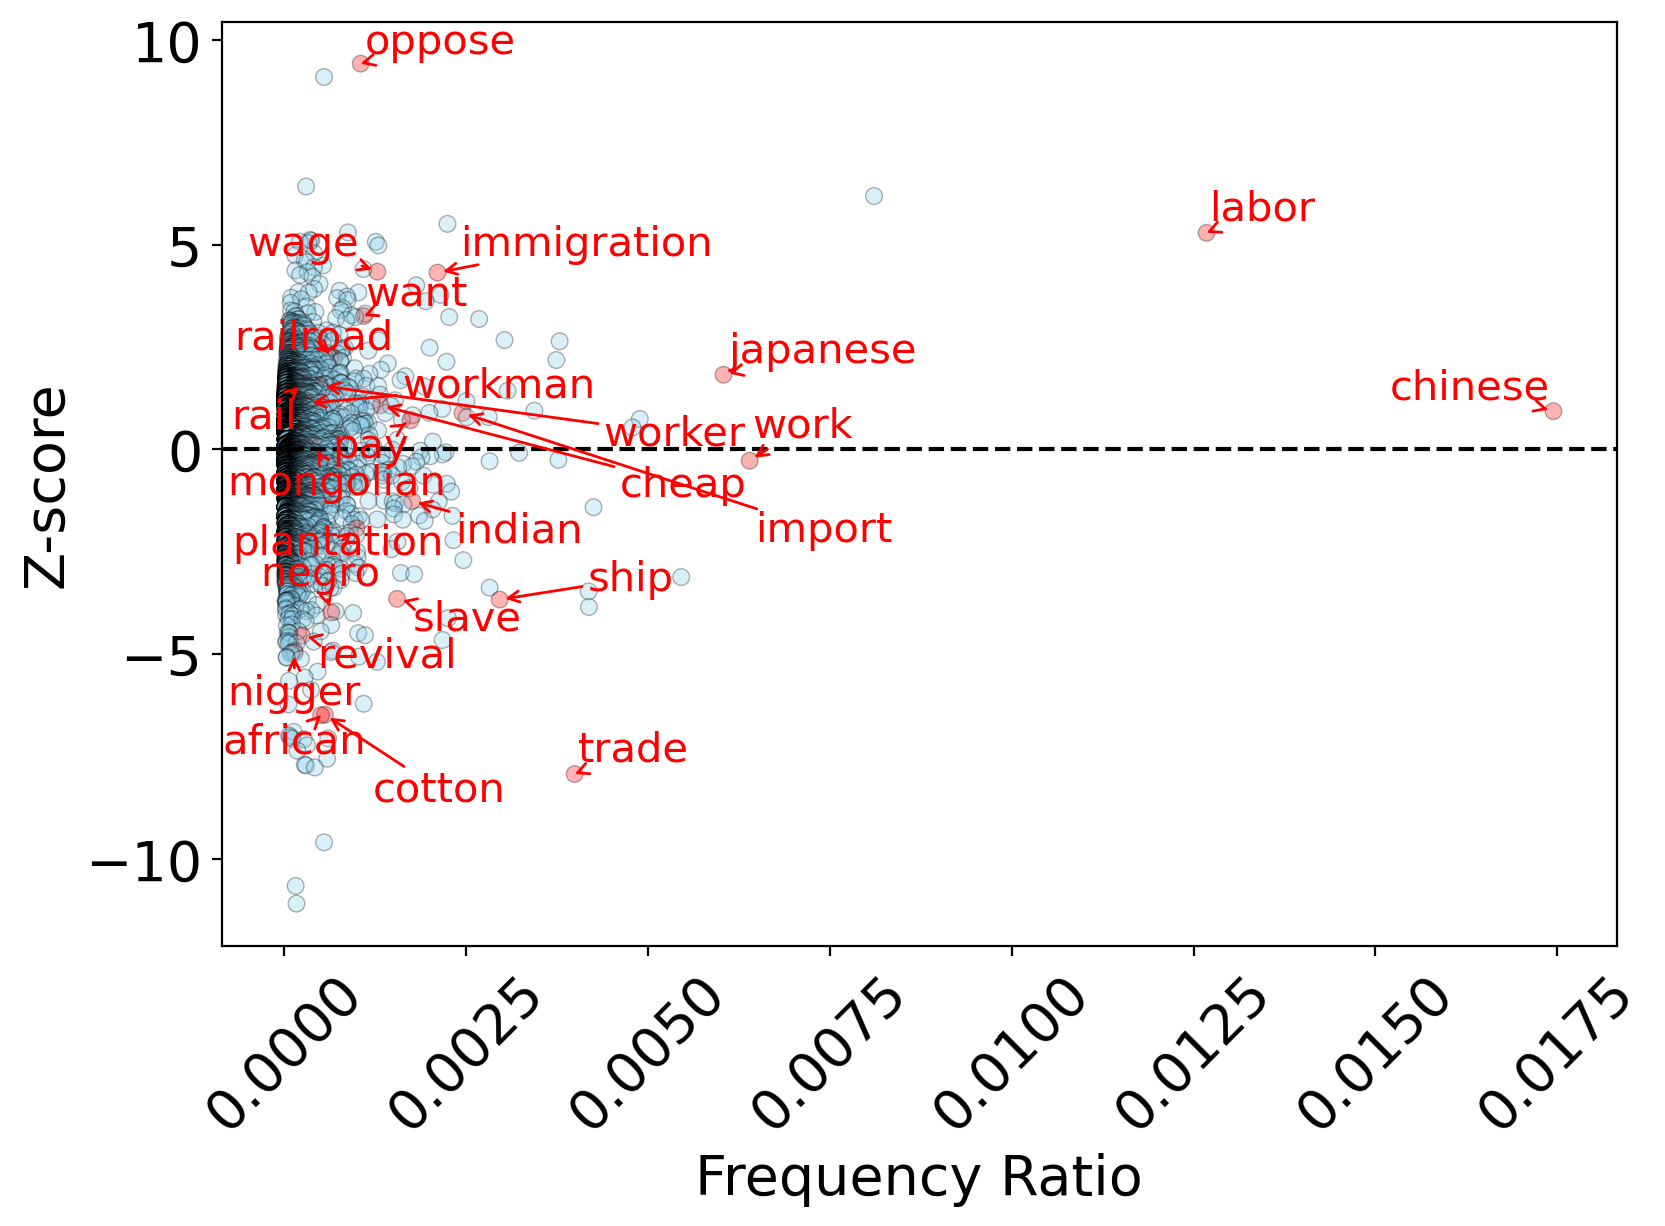

In [35]:
fig, ax = plt.subplots(figsize=(9, 6), dpi=200)
scatter = plt.scatter(y=viz_df['z-score'], x=viz_df['freq_ratio'], 
           alpha=0.3, color=viz_df['color'],
           marker='o', edgecolors='black', linewidths=0.5)
ax.axhline(y=0.0005, color='black', linestyle='--')

# List of tokens to annotate and their corresponding colors
tokens_to_annotate = color_mapping

annotations = []
for idx, row in viz_df.iterrows():
    token = row['token']
    if token in tokens_to_annotate:
        color = tokens_to_annotate[token]
        annotation = ax.annotate(token, (row['freq_ratio'], row['z-score']), color=color, fontsize=15)
        annotations.append(annotation)

# Use adjust_text to prevent label overlap
adjust_text(annotations, arrowprops=dict(arrowstyle='->', color='red'))

plt.xticks(rotation=45)
ax.tick_params(axis='both', which='both', labelsize=20)  # Increase tick label font size

plt.xlabel('Frequency Ratio', fontsize=20)
plt.ylabel('Z-score', fontsize=20)


# Save the plot to a file (e.g., PDF)
plt.savefig('eacl2023_latex/figure/' + 'z-score-token-union-confederate.pdf', bbox_inches='tight', dpi=200)

plt.show()


emotion detection

In [36]:
from nrclex import NRCLex
import pandas as pd

In [37]:
path='/Users/mstudio/Library/CloudStorage/Box-Box/coolie/sent/'
emo_df=pd.read_csv(path+'viz.csv')

In [38]:
NRCLex('miserable').affect_frequencies

{'fear': 0.0,
 'anger': 0.25,
 'anticip': 0.0,
 'trust': 0.0,
 'surprise': 0.0,
 'positive': 0.0,
 'negative': 0.25,
 'sadness': 0.25,
 'disgust': 0.25,
 'joy': 0.0}

In [39]:
token_emotion={}
for token in emo_df['token']:
    emotion=NRCLex(str(token))
    token_emotion[str(token)]=emotion.affect_frequencies

In [40]:
token_emotion_df=pd.DataFrame.from_dict(token_emotion).T.reset_index()
token_emotion_df=token_emotion_df.rename({'index':'token'}, axis=1)

In [41]:
emo_merged=pd.merge(token_emotion_df, emo_df, on='token')
emo_south=emo_merged[emo_merged['z-score']<0]
emo_rest=emo_merged[emo_merged['z-score']>0]

In [42]:
print(emo_south.shape, emo_rest.shape)

(5994, 15) (9004, 15)


In [43]:
emo_mean_south={}
for col in ['fear', 'anger', 'anticip', 'trust', 'surprise', 'sadness', 'disgust', 'joy']:
    if col != 'anticip':
        emo_mean_south[col]=emo_south[col].mean()
    elif col == 'anticip':
        emo_mean_south['anticipation']=emo_south[col].mean()

In [44]:
emo_mean_rest={}
for col in ['fear', 'anger', 'anticip', 'trust', 'surprise', 'sadness', 'disgust', 'joy']:
    if col != 'anticip':
        emo_mean_rest[col]=emo_rest[col].mean()
    elif col == 'anticip':
        emo_mean_rest['anticipation']=emo_rest[col].mean()

In [45]:
emo_mean_south

{'fear': 0.015499891425817352,
 'anger': 0.010853313631091408,
 'anticipation': 0.0,
 'trust': 0.02229398710880192,
 'surprise': 0.00594589298293002,
 'sadness': 0.0132379072193887,
 'disgust': 0.011070660607697645,
 'joy': 0.007982453352823722}

In [46]:
emo_mean_rest

{'fear': 0.015742870893359562,
 'anger': 0.012502644327388884,
 'anticipation': 0.0,
 'trust': 0.027395231748852365,
 'surprise': 0.006807820862685368,
 'sadness': 0.010608115969621967,
 'disgust': 0.007871898203972837,
 'joy': 0.007880624484356159}

entire emotion

In [47]:
from nrclex import NRCLex
import pandas as pd
from ast import literal_eval
from tqdm import tqdm

In [48]:
path='/Users/mstudio/Library/CloudStorage/Box-Box/coolie/sent/'
df=pd.read_csv(path+'coolie-lemma-df-sent.csv', converters={'state':literal_eval, 'context':literal_eval, 'city':literal_eval, 'sent_token':literal_eval})

In [49]:
sent_emotion={}
for idx, token in tqdm(enumerate(df['sent_lemma'])):
    emotion=NRCLex(str(token))
    sent_emotion[idx]=emotion.affect_frequencies

118054it [01:10, 1679.99it/s]


In [50]:
sent_emotion_df=pd.DataFrame.from_dict(sent_emotion).T
# sent_emotion_df=sent_emotion_df.rename({'index':'token'}, axis=1)

In [51]:
sent_emotion_df['anticipation']=sent_emotion_df['anticipation'].fillna(0)

In [52]:
sent_emotion_df['anticipation']=sent_emotion_df['anticip']+sent_emotion_df['anticipation']
sent_emotion_df=sent_emotion_df.drop(columns=['anticip'])

In [53]:
sent_emotion_df.columns

Index(['fear', 'anger', 'trust', 'surprise', 'positive', 'negative', 'sadness',
       'disgust', 'joy', 'anticipation'],
      dtype='object')

In [54]:
emo_merged=pd.merge(sent_emotion_df, df, left_index=True, right_index=True)

In [55]:
emo_merged['state_str']=emo_merged['state'].str[0]

In [56]:
emo_merged=emo_merged[~emo_merged['state_str'].isnull()]
emo_merged=emo_merged[emo_merged['state_str']!='Virgin Islands']
emo_merged=emo_merged[emo_merged['state_str']!='Puerto Rico']

In [58]:
#emo_merged.groupby(by='state_str').mean()['fear'].sort_values(ascending=False)

In [59]:
#emo_merged.groupby(by='state_str').mean()['anger'].sort_values(ascending=False)

In [60]:
#emo_merged.groupby(by='state_str').mean()['trust'].sort_values(ascending=False)